# ECON 323 Final Project

***Correlation between players’ signing expenditure and the performance of the teams in the Spanish soccer league from the season 2009/2010 to 2018/2019.***

Sebastian Luna

# Background

Football Industry is one of the biggest and most profitable industries compared to other sports. Only the European football market was worth €28.4bn (CAD40.92bn), according to a press release by Deloitte in 2019. A value that should not be a surprise considering that during the FIFA World Cup 2018 final, 1.12 billion people watched it live (FIFA, 2018). Meanwhile, during the same year, major events like the Super Bowl LII for American Football and the Major League Baseball (MLB) Postseason reported a viewers rating of 103.4 million and 7.5 million, respectively.

Each club has its own managerial and sports strategies to ensure it can achieve its goals while considering its budget or another type of constraint. Some of them, especially the wealthiest ones, are expected to compete and win all titles. On the other hand, those less affluent clubs have lower expectations, such as staying away from relegation positions. The reality of each team is different, however, all of them agree on one thing, which is they have to look for the best path to win. A way of doing so is by building the best team with the best players they can afford. This project will focus on identifying and analyzing the effects players’ signing expenditure has on the performance of the teams in the Spanish soccer league from season 2009/2010 to 2018/2019, using data provided by Transfermarkt.


The transfer market is a free market, in which the best and most coveted talents have a high value that not all teams can afford. Therefore, it will be identified if spending high amounts on transfers correlates with better results during the period previously mentioned. More precisely, a greater expenditure in signings equals a better position in terms of total points accumulated during the ten sessions in dispute.

# Literature Review

Different studies considered whether revenue disparities among clubs threaten fairness in the competitiveness in sports, Stephen Hall, Stefan Szymanski, and Andrew Zimbalist are remarkable economists in this area. In their studies, published in journals of sports economics, they used data on team payrolls in Major League Baseball between 1980 and 2000 to examine the relationship runs from payroll to performance. Then, as a comparison, data from English soccer is analyzed. According to Hall et al. (2002), there appears to be a link between player spending and the improvement of English soccer teams from 1973 to 1999. Nevertheless, if measurements of expenditure on players and player development were more precise, a causal link from player costs to performance would become stronger.

# Hypothesis/Research

- The teams that have spent the most will be those that will have the best sports performance.
- F.C. Barcelona, Real Madrid, and Atletico de Madrid will be the teams that have spent the most and will have the most points in total.
- There will be revenue disparity reflected in the ability of the wealthiest teams to invest in players compared to the less rich. This disparity will lead to a difference in the points obtained and will affect competitiveness. Ultimately, the Spanish league can be turned into one in which only the richest compete.

# Datasets and Analysis

All modules are imported for the creation of the datasets

In [20]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
from unicodedata import normalize
import json
import urllib.request
from sklearn import linear_model
import statsmodels.api as sm
import seaborn as sns

#You should install lxml library in order to run the code (pip3 install lxml)
#For the elaboration of this project I used Jupyter notebook and wrote "pip3 install lxml" in the launcher > terminal

Then, we obtain the data from https://www.transfermarkt.es/, a web page that has footballing information regarding transfer news, results, team performances, and other related data. 

In [2]:
lista_bds=[]

for x in range(11):
    año=2009+x

    my_url = "https://www.transfermarkt.es/laliga/transfers/wettbewerb/ES1/plus/?saison_id={}&s_w=&leihe=1&intern=0&intern=1".format(año)

    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.13; rv:63.0) Gecko/20100101 Firefox/63.0'}

    req = urllib.request.Request(url=my_url, headers=headers)

    with urllib.request.urlopen(req) as response:
        page_html = response.read()

    soup=BeautifulSoup(page_html,"html.parser")

    table_MN = pd.read_html(page_html)

    lista_equipos=[]
    for x in soup.find_all('h2'):
        try:
            lista_equipos.append(x.find_all("a")[0].img["alt"])
        except:
            pass

    lista_equipos2=[]
    altasbajas=[]
    for x in lista_equipos[:int(len(lista_equipos)/2)]:
        for i in range(2):
            if i==0:
                altasbajas.append("altas")
            else:
                altasbajas.append("bajas")
            lista_equipos2.append(x)

    equipos=table_MN[1:]

    for i in range(40):
        if equipos[i].iloc[:,0].name=="Altas":
            equipos[i]=equipos[i].rename(columns={"Altas":"jugador"})
        if equipos[i].iloc[:,0].name=="Bajas":
            equipos[i]=equipos[i].rename(columns={"Bajas":"jugador"})
        equipos[i]["altasbajas"]=altasbajas[i]
        equipos[i]["equipobase"]=lista_equipos2[i]

    bd2=pd.concat(equipos).reset_index(drop=True)
    bd2["año"]=año
    
    lista_bds.append(bd2)

After we have available the datasets corresponding to the years to be evaluated, from seasons 2009 to 2019, we concatenate them and clean the variables related to costs.

In [3]:
bd3=pd.concat(lista_bds).reset_index(drop=True)

bd4=bd3.loc[bd3["Coste"].apply(lambda x: "mil" in x)].copy()
bd4["Coste"][0]

def tarifa(x):
    k=str(x)
    if k.startswith("Tarifa"):
        k = k[19:]
    else:
        pass
    
    if "mill" in k:
        return float(k[:k.index("mil")-1].replace(",","."))*1000000
    elif k=="-":
        return k
    else:
        return float(k[:k.index("mil")-1].replace(",","."))*1000
    
bd4["Coste"]=bd4["Coste"].apply(lambda x: tarifa(x))
bd4["Valor de mercado"]=bd4["Valor de mercado"].apply(lambda x: tarifa(x))

***Analysis #1 - Total expenditure in players' signing from 2009-2019***

In [4]:
bd5=pd.DataFrame(bd4.groupby(["equipobase","altasbajas"])["Coste"].sum()).reset_index()
bd6=bd5.loc[bd5["altasbajas"]=="altas"].sort_values(by=["Coste"],ascending=False)
bd6["Coste"]=bd6["Coste"].apply(lambda x: x/(10**6))
bd6.reset_index(drop=True)[["equipobase","Coste"]]

,equipobase,Coste
0,FC Barcelona,1542.170
1,Real Madrid CF,1431.150
2,Atlético de Madrid,1006.195
3,Sevilla FC,607.380
4,Valencia CF,606.670
5,Villarreal CF,380.550
6,Real Betis Balompié,220.035
7,RCD Espanyol,153.650
8,Real Sociedad,151.550
9,Málaga CF,124.310


Using the data provided by Transfermarkt, a table that collects the total spending on players’ signings of the teams in the Spanish league from 2009/2010 to the 2018/2019 season has been made. From the 34 enlisted teams, the maximum value corresponds to F.C. Barcelona with a total of 1.542 million euros, and the minimum is from Xerez CD with a total of 500K euros.

Likewise, the first three teams, which are: FC Barcelona, Real Madrid CF, and Atletico de Madrid, spent more than one billion euros on signings, unlike the following 31 teams, which during that period expenses were less than one billion euros. On the other hand, the last three teams, which are: Córdoba CF, CD Tenerife, and Xerez CD, have expenses below millions of euros.

In [5]:
bd6.reset_index(drop=True)[["equipobase","Coste"]].describe()

,Coste
count,35.000000
mean,200.584000
std,386.422446
min,0.500000
25%,9.475000
50%,40.430000
75%,137.930000
max,1542.170000


The average amount spend on players signing is 200.584 million euros, and the standard deviation is 386.422.446 million euros, as shown in the distribution graph. Atletico de Madrid's spending is three standard deviations away from the mean, and F.C. Barcelona and Real Madrid are four standard deviations from the average. The bottom three values are all one standard deviation away. The top three clubs' expenditure is far from the mean which shows their economic capacity to spend on more and better players.  Excluding those clubs with more than 600 million euros of expenditure, the average expenditure is 104 million euros, which demonstrates how the outlier data from the wealthiest clubs can shift the mean by almost double the actual average of the majority of teams.

In [6]:
bd6.reset_index(drop=True)[["equipobase","Coste"]].loc[bd6.reset_index(drop=True)[["equipobase","Coste"]]["equipobase"].apply(lambda x: x in ["FC Barcelona","Real Madrid CF","Atlético de Madrid"])==False].describe()

,Coste
count,32.000000
mean,95.028906
std,156.294137
min,0.500000
25%,9.075000
50%,30.975000
75%,110.165000
max,607.380000


However, if the top 3 clubs with the highest expenditure are excluded, the mean becomes significantly smaller. Once again, the outlier data from the points obtained by F.C. Barcelona, Real Madrid, and Atletico de Madrid, shifts the average points that the rest of the less wealthy and talented teams have gotten. Previously, the mean was set at 200.584 million euros but now it is 95.029 million euros, which is approximately a 105.555 million euros of difference.


This will be more visually clear later in normal distribution graphs.


***Analysis #2 - Total accumulated points seasons 2008/2009 - 2018/2019***

Next, a data set containing the sum of points obtained by each team that has participated in the Spanish football league in the seasons 2009/2010 to 2018/2019, has been made. For the sake of comprehension, in the Spanish soccer league, in a football match between two teams, there are three possible results: a win, a tie, or a loss. A win awards the victorious team 3 points, a tie one for each team, and a loss gives no points to the losing team.

It was decided to sum up all the points obtained by each team during this period as a direct measure of good performance within the league. In other words, the team that achieved the most points during a season will be the champion, so it is safe to say that adding up all the points will give us an idea of each team's success and failure. Titles were not taken into account because more data is wanted to demonstrate the disparity that exists in the teams' performance that participated due to the disparity in the clubs' revenue. There is only one champion and the idea is to get data from all the teams.

In [7]:
lista_resultados=[]

for x in range(11):
    año=2009+x
    my_url = "https://www.transfermarkt.es/laliga/tabelle/wettbewerb/ES1/saison_id/{}".format(año)

    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.13; rv:63.0) Gecko/20100101 Firefox/63.0'}

    req = urllib.request.Request(url=my_url, headers=headers)

    with urllib.request.urlopen(req) as response:
        page_html = response.read()
    
    resultado=pd.read_html(page_html)
    resultado[1]["año"]=año
    lista_resultados.append(resultado[1])

The next table collects and orders in ascending order the accumulated points of the clubs that have participated in the Spanish league from 2009/2010 to 2018/2019. From the 35 enlisted teams, the maximum value corresponds again to F.C. Barcelona with a total of 1010 points, and the minimum is from Cordoba CF with a total of 20 points. The top three of the table are completed by Real Madrid with 966 and Atletico Madrid with 796 points. On the contrary, the bottom three with Xerez CD with 34 and S.D. Huesca with 33 points. 

In [21]:
resultados3.groupby(["equipobase"])[["Pto.","+/-"]].sum().sort_values(by=["Pto."],ascending=False)

,Pto.,+/-
equipobase,,
FC Barcelona,1010,798
Real Madrid CF,966,685
Atlético de Madrid,796,309
Valencia CF,671,128
Sevilla FC,671,112
Athletic Club,603,19
Villarreal CF,574,74
Real Sociedad,530,15
RCD Espanyol,500,-133


The top 5 teams are F.C. Barcelona, Real Madrid, Atletico de Madrid, Valencia C.F., and Sevilla F.C. which not by coincidence are the same teams that were on top of the table on the spending of player signing. This observation supports the first hypothesis of the project. Those teams that have spent the most are the ones that have had the best sports performance. There is a relationship, at least during the evaluated seasons, between the teams that are less economically constrained to spend on players’ signatures and competing for the Spanish league. 

According to the accumulated points as a measure of sports performance that was established previously, the clubs with more points are the ones that have been more successful during the ten seasons. It is worth mentioning that the fact of being in the top 5 constantly means that the team will qualify for European championships like the UEFA Champions League or UEFA Europa League which give qualified teams a bonus for qualifying. Furthermore, a better team attracts more fans that will buy tickets and attend the stadium, sponsors, and contracts which will be translated into revenue for the club. Therefore, it makes sense that teams are interested in remaining on top of the table,  to keep getting money, and being able to manage financially the institution while being able to attract and sign the best players available. A further study on the sources of revenue of the top 5 teams should be made, but at least it can be noticed that clubs feed from money that arises from sports success, and vice versa.

In [17]:
resultados.groupby(["Club.1"])[["Pto.","+/-"]].sum().describe()

,Pto.,+/-
count,35.000000,35.000000
mean,329.314286,0.000000
std,265.406766,206.630247
min,20.000000,-165.000000
25%,126.500000,-93.500000
50%,267.000000,-58.000000
75%,489.500000,-23.000000
max,1010.000000,798.000000


The average of total points collected between 2009 and 2019 is 329.31 points, with a standard deviation of 265.47. Atletico de Madrid total points is 2 standard deviations away from the mean,  FC Barcelona and Real Madrid values are between 2 and 3 standard deviations. The bottom three values are all between one and two standard deviations away. 

In [18]:
resultados.loc[resultados["Club.1"].apply(lambda x: x in ["Atlético de Madrid","FC Barcelona","Real Madrid CF"])==False].groupby(["Club.1"])[["Pto.","+/-"]].sum().describe()

,Pto.,+/-
count,32.000000,32.000000
mean,273.562500,-56.000000
std,197.486127,69.515373
min,20.000000,-165.000000
25%,110.250000,-101.500000
50%,242.500000,-63.000000
75%,403.250000,-27.250000
max,671.000000,128.000000


The top 3 clubs with the most points are excluded, the mean becomes significantly smaller. Once again, the outlier data from the points obtained by F.C. Barcelona, Real Madrid, and Atletico de Madrid, shifts the average points that the rest of teams have gotten. Previously, the mean was set at 329.31, but now it is 273.56, which is 55.75 points of difference. Which are a lot of points, just for reference, in the last Spanish league evaluated (2018-2019), having 55 would have been enough for a team to be in the seventh position and classify to the Europa League.


***Analysis using Distribution Graphs and Regression***

Then, we concatenate all the data sets containing the results, we change the name of the values in order to do a merge with the two datasets later.

In [11]:
nombresc={"Club.1":{
"Athletic":"Athletic Club",
'Atlético Madrid':'Atlético de Madrid',
'Dep. Alavés':'Deportivo Alavés',
'Getafe':'Getafe CF',
'RC Celta':'RC Celta de Vigo',
'RC Deportivo':'RC Deportivo de La Coruña',
'Racing':'Real Racing Club ',
'Real Betis':'Real Betis Balompié',
'Real Madrid':'Real Madrid CF',
'Real Sporting':'Real Sporting de Gijón',
'Real Valladolid':'Real Valladolid CF'}}

resultados=pd.concat(lista_resultados).reset_index(drop=True).replace(nombresc)

resultados2=pd.DataFrame(resultados.groupby(["Club.1","año"])[["Pto.","+/-"]].sum()).reset_index()

resultados3=resultados2.rename(columns={"Club.1":"equipobase"})

In [12]:
bd5=pd.DataFrame(bd4.groupby(["equipobase","altasbajas"])["Coste"].sum()).reset_index()
bd6=bd5.loc[bd5["altasbajas"]=="altas"].copy()
bd6["Coste"]=bd6["Coste"].apply(lambda x: x/(10**6))

bd7=bd5.loc[bd5["altasbajas"]=="bajas"].sort_values(by=["Coste"],ascending=False)
bd7["Coste"]=bd7["Coste"].apply(lambda x: x/(10**6))

bd8=bd6.merge(bd7,how="inner",on="equipobase")[["equipobase","Coste_x","Coste_y"]].rename(columns={"Coste_x":"Gasto","Coste_y":"Ingreso"})
bd8["Balance"]=bd8["Ingreso"]-bd8["Gasto"]
bd9=bd8[bd8["equipobase"].apply(lambda x: x in ["Atlético de Madrid","FC Barcelona","Real Madrid CF","Valencia CF","Sevilla FC"])==False]

/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Gasto', ylabel='Density'>

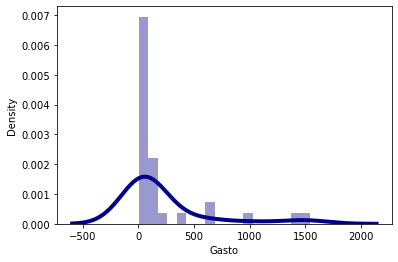

In [13]:
sns.distplot(bd8['Gasto'], kde=True, 
             color = 'darkblue', 
             kde_kws={'linewidth': 4})

/opt/conda/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Gasto', ylabel='Density'>

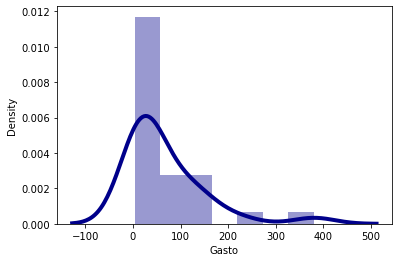

In [14]:
sns.distplot(bd9['Gasto'], kde=True, 
             color = 'darkblue', 
             kde_kws={'linewidth': 4})


In the first distribution graph, the horizontal axis is the cost for transfers in millions of euros and the vertical axis is the density or the number of teams. The value 0 represents the average cost of all the teams, which was 200,584 million euros. The larger the area under the curve, the greater the number of teams that meet that specific spending level. Starting from the left to the right are those teams that have spent less than the average on transfers during the ten seasons, teams like Real Zaragoza, C.A. Osasuna, and Girona F.C., among others. The cost of the teams is increasing and the number of teams also when going to the right of the graph, reaching the peak of the graph is at the x-value of 0 that represents the average and is where a greater number of teams are close to 200,584 million euros. From here, the density drops until it reaches the lower right corners, already very far from the average, in which Atletico de Madrid, Real Madrid C.F., and F.C. Barcelona meet.

Remember that at the beginning it was mentioned that these clubs were three to four standard deviations away from the average. Which graphically demonstrates the distance in terms of spending capacity that these three clubs have had compared to the others. Likewise, it is possible to demonstrate the disparity that exists for these clubs to hire better players and prepare better for the championships, which, as already seen, has led them to have better sports results. For that reason, it has been decided to zoom in on the peak of the distribution in a second graph to understand its nature without the outliers data. The result is that the distribution graph has a shorter lower upper tail (on the right) and the density of the rest of teams can be seen better. 

Finally, we merge the datasets of the teams expenditures on the player market and data set of the teams results, in order to perform an OLS regression to see if there is an effect of players' signing in the total accumulated points of the teams during the ten seasons evaluated.

In [15]:
bd10=pd.DataFrame(bd4.groupby(["equipobase","altasbajas","año"])["Coste"].sum()).reset_index()
bd11=bd10.loc[bd10["altasbajas"]=="altas"].copy()

bd11["equipotemp"]=bd11["equipobase"]+"/"+bd11["año"].apply(lambda x: str(x))

bd_1=bd3.loc[bd3["altasbajas"]=="altas"]

bd_2=pd.concat([bd_1, pd.get_dummies(bd_1[["Posición"]])], axis=1)
bd_3=bd_2.groupby(["equipobase","año"])[list(bd_2.iloc[:,14:].columns)].sum().reset_index()

bd_3["equipotemp"]=bd_3["equipobase"]+"/"+bd_3["año"].apply(lambda x: str(x))

resultados3["equipotemp"]=resultados3["equipobase"]+"/"+resultados3["año"].apply(lambda x: str(x))

resultados4=resultados3.merge(bd11[["equipotemp","Coste"]],how="left",on="equipotemp").replace(np.nan,0)
resultados4["año"]=resultados4["año"].apply(lambda x: str(x))

resultados5=resultados4.merge(bd_3,how="left",on="equipotemp").replace(np.nan,0)

temp_log = np.log(resultados5["Coste"])
temp_log[temp_log==-np.inf] = 1
temp_log[temp_log==-0] = -1

resultados5["lncoste"] = temp_log

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


For the following analysis, the total expenditure in players’ signing of all the teams per year data was used instead of the accumulated values for the ten seasons, as a matter of having more data that will allow the regression to be more precise. The total accumulated points are the dependent variable, and the independent variable is the natural logarithm of the total expenditure in players’ signing of all the teams per year. The control variables are the number of center-forwards and center-backs signed.

The natural logarithm gives us the percentage change of the expenditure and not the expenditure. The coefficient of the cost (expenditure on players’ signing) of 37.7240 and 1.7388 shows us a positive correlation between investing in players and increased performance in terms of points per season. Conversely, the negative values of the coefficient of -1.6972 and -2.3704 let us notice the inverse correlation that exists on only focusing on signing center-forwards and center-back can actually decrease performance. The last relationship is something that was not expected at the beginning of the project but would be interesting to analyze.

In [16]:
X = resultados5[["lncoste","Posición_Delantero centro","Posición_Defensa central"]] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = pd.DataFrame(resultados5['Pto.'])
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   Pto.   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     21.58
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           2.90e-12
Time:                        21:02:28   Log-Likelihood:                -912.77
No. Observations:                 220   AIC:                             1834.
Df Residuals:                     216   BIC:                             1847.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

# Conclusions

There appears to be a link between players’ signing and the improvement in the performance of the teams that participated in the Spanish league from 2009/2010 to 2018/2019. This is the main relationship of concern of the project because this means that there is a disparity in the competitiveness of the league (some teams having way better results in terms of accumulated points) that comes from the disparity in the capacity of a few teams to hire more and better players. The project results support the second hypothesis of the project in which F.C. Barcelona, Real Madrid, and Atletico de Madrid were going to be the clubs that spent the most and had greater success, as seen in the tables. Finally, it is clear that the revenue disparity reflected in the ability of the wealthiest teams to invest in players compared to the less affluent lead to a difference in the points obtained and affects competitiveness.

# Limitations

The lack of variables is a problem when performing the analyses, since there may be different effects that are not being considered in the main variables, as well as biases in these.

- The analysis, results, and conclusions are not conclusive and can only be drawn to the period between the years 2009-2019 in Spain in the Spanish league. As studied in the paper by Stephe Hall, Stephen Szymanski, and Andrew Zimbalist, the project wanted to extrapolate the analysis of expenditure on players’ signing in league competitiveness with more updated data.
- The causes of the existing disparity shown in this project, are not explored, therefore, this limits a deeper analysis of the topic studied.

# References

- Hall, S., Szymaski, S., & Zimbalist, A. (2002). Testing Causality Between Team Performance and Payroll. The Cases of Major League Baseball and English Soccer. Journal of Sports Economics. https://journals.sagepub.com/doi/10.1177/152700250200300204
- Tena, J., Forrest, D., & Flores, R. (2010). Impact on Competitive Balance from Allowing Foreign Players in a Sports League: Evidence from European Soccer. No. 4, 546-557. https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1467-6435.2010.00487.x
- European football market worth €28.4 billion (£25.1bn) as Premier League clubs lead the way to record revenues. (2019, May 29). Deloitte. Retrieved December 13, 2022, from https://www2.deloitte.com/uk/en/pages/press-releases/articles/european-football-market-worth-28-billion-euros-as-premier-league-clubs-lead-the-way-to-record-revenues.html
- Picchi, A. (2018, February 25) . Super Bowl LII: Ratings for football's biggest game lowest since 2009. CBS News. https://www.cbsnews.com/news/super-bowl-lii-tv-ratings/
- More than half the world watched record-breaking 2018 World Cup. (2018, December 21). FIFA. Retrieved December 13, 2022, from https://www.fifa.com/tournaments/mens/worldcup/2018russia/media-releases/more-than-half-the-world-watched-record-breaking-2018-world-cup
- Hernandez, K. (2018, October 10). Ratings Roundup: 2018 MLB Postseason Sees Low Numbers in NLDS; NFL Ratings Continue to Rise. SVG. https://www.sportsvideo.org/2018/10/10/147726/